# Introduction
I will be working on the incidentBlotter.csv file. It is a report of incidents reported by Pittsburgh law enforcement (not including campus police or Port Authority police).


## The Metric

The sub-metric for this specific csv: A ranking system wouldbe introduced. 
The "Bad Value" of a neighborhood would be determined by an arbitrary equation:


$N = z + \sum_{i_0}^{i_k}v_i$


Where $i$ is the $i$th incident of the neighborhood within the dataset, with $i_0$ being the first in the dataset and $i_k$ being the last,
where $v_i$ is the "bad" value of the ith incident, as determined by another ranking, based on the INCIDENTHIERARCHYDESC column (OPINIONATED PORTION),
and where $z$ is the amount of incidents in that neighborhood

## Work

We will first import the necessary libraries

In [64]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

Now, we load in the data.

In [60]:
raw_data = pd.read_csv("incidentBlotter.csv")

The $z$ value within the equation to would be the easiest to figure out. We obtain the number of incidents within each neighborhood. The below plot shows the 10 neighborhoods with the lowest amount of incidents.

<Axes: xlabel='INCIDENTNEIGHBORHOOD'>

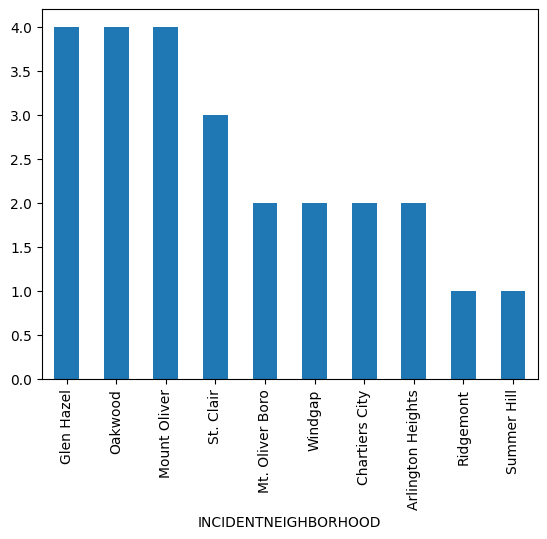

In [95]:
z_vals = raw_data['INCIDENTNEIGHBORHOOD'].value_counts()
z_vals.tail(10).plot.bar()

It looks like **Summer Hill** and **Ridgemont** are contenders to be the best, according to currently processed information.

<Axes: xlabel='INCIDENTNEIGHBORHOOD'>

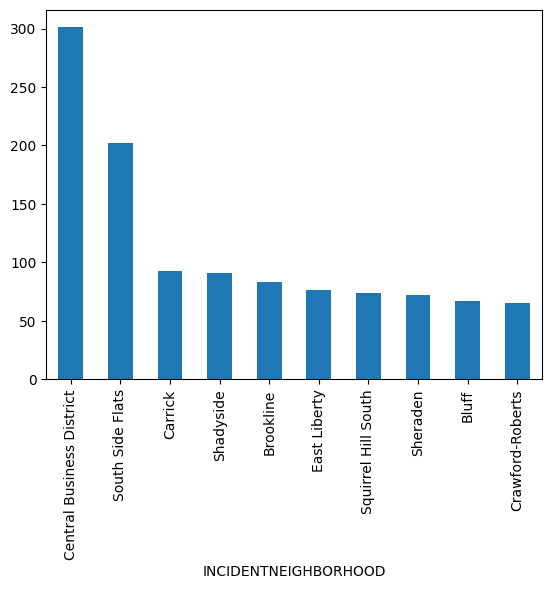

In [66]:
z_vals.head(10).plot.bar()

It looks like Central Business District has byfar the most incidents reported by the police.

Afterwards, it is necessary to determine the $v_i$ values for each incident. **This is the opinionated part of the analysis**. Each incident will be ranked as an index to a Series, and the value of each index would be an integer from 1 to 86 (the amount of different incidents), with the incident with value 1 being the least "bad", while the incident of value 86 being the most "bad."

In [63]:
i_v_vals = pd.Series(raw_data['INCIDENTHIERARCHYDESC'].unique())
raw_data['INCIDENTHIERARCHYDESC'].unique() #Display the series to copy-paste

array(['HIT AND RUN', 'HARRASSMENT/THREAT/ATTEMPT/PHY', '99', 'THEFT',
       'MISSING PERSONS (18+)', 'FOUND PROPERTY',
       'RETSIL THEFT (SHOPLIFTING)', 'SIMPLE ASSAULT',
       'STOLEN PROPERTY - OTHER', 'CRIMINAL MISCHIEF',
       'INJURY/TAMP/FIRE APP-HYD-ETC', 'LOST PROPERTY', 'HARRASSMENT',
       'IDENTITY THEFT', 'AIDED CASE', 'THEFT BY EXTORTION',
       'SEXUAL ABUSE OF CHILDREN', 'RECEIVING STOLEN PROPERTY',
       'TERRORISTIC THREATS', 'BENCH WARRANT ARREST - NO TIE',
       'MENTAL 201/302', 'THEFT FROM AUTO',
       'RESIST ARREST/OTHER LAW ENFORC', 'CRIM MISCHIEF',
       'STOLEN PROPERTY', 'MISCELLANEOUS FIRE OTHER INVEST CONTINUED',
       'BURGLARY', 'DEAD ON ARRIVAL (DOA)', 'RETAIL THEFT (SHOPLIFTING)',
       'RUNAWAYS - JUVENILE', 'CONCEALING DEATH BASTARD CHILD',
       'ENDANGER WELFARE OF CHILDREN', 'ROBBERY', 'DRUG INVESTIGATION',
       'DUI - GENERAL IMPAIRMENT', 'MISCELLANEOUS INVESTIGATION',
       'NON-VIOLENT DOMESTIC', 'THEFT OF LEASED PROPERTY',
  

Because the incidents are ranked **based on opinion instead of logic**, it was necessary to hand copy-paste all the values into a list. 

In [65]:
intList = []
for i in range(86):
    intList.append(i+1)

v_i_sorted = pd.Series(intList,index = ['99','DOG BITE','RUNAWAYS - JUVENILE','MISCELLANEOUS INVESTIGATION','FOUND PROPERTY','LOST PROPERTY','INJURY/TAMP/FIRE APP-HYD-ETC',
                        'FALSE RPT LAW ENFORCE AUTH',
                        'PROSTITUTION INVESTIGATION', 'SOLICITING ANOTHER TO PATRONIZE A PROSTITUTE','DISORDERLY CONDUCT', 'OPEN LEWDNESS', 'PUBLIC DRUNKENESS',
                        'FALSE ALARMS AGENCIES PUB SAF',  'FAILURE TO PREVENT CATASTROPHE', 'NEGLECT OF CARE-DEPENDENT PERSON',
                        'AGRICULTURAL VANDALISM', 'CREDIT CARDS', 'FORGERY', 
                        'BENCH WARRANT ARREST - NO TIE', 'NON-VIOLENT DOMESTIC', 'LOITERING PROWLING AT NIGHT', 'INDECENT EXPOSURE',
                        'RETALIATION FOR PAST OFF ACTION', 'UNAUTHORIZED USE VEHICLE', 'INTERFER/CUSTODY OF CHILDREN', 
                        'MENTAL 201/302', 'RESIST ARREST/OTHER LAW ENFORC', 'MISCELLANEOUS FIRE OTHER INVEST CONTINUED', 'MISCELLANEOUS FIRE VEH INVEST CONTINUED',
                        'CRIMINAL TRESPASS', 'TAMPER WITH/FAB PHYS EVIDENCE', 
                        'FOUND DRUGS', 'THEFT OF SERVICES', 'ARREST ON ATTACHMENT ORDER',
                        'HARRASSMENT','HARRASSMENT/THREAT/ATTEMPT/PHY',  'PUR/CON/POS/TRAN-INTOX BEVERAG', 
                        'IDENTITY THEFT','SIMPLE ASSAULT','AIDED CASE', 'DRUG INVESTIGATION', 'CRIM MISCHIEF (GRAFFITI)',  'INDECENT ASSAULT', 'INDECENT ASSAULT WITHOUT CONSENT',
                        'CRIMINAL MISCHIEF','CRIM MISCHIEF','STOLEN PROPERTY','STOLEN PROPERTY - OTHER', 'RECEIVING STOLEN PROPERTY',
                        'DUI - GENERAL IMPAIRMENT', 'DUI - DRUG - IMPAIRED ABILITY','DUI - HIGHEST RATE OF ALCOHOL - BAC >= .16%', 'AGG-ASSAULT', 'RECKLESSLY ENDANGER ANOTH PER', 'DANGEROUS BURNING',
                        'INDUSTRIAL ACCIDENT', 'MEGANS LAW VIOLATION', 
                        'THEFT-FAIL MAKE DISP FUNDS REC',
                        'RETSIL THEFT (SHOPLIFTING)','RETAIL THEFT (SHOPLIFTING)','THEFT','THEFT BY DECEPTION','THEFT BY EXTORTION','THEFT FROM AUTO', 'TERROR RELATED REPORT - MISC.',
                        'TERRORISTIC THREATS', 'THEFT OF LEASED PROPERTY', 'BURGLARY', 'POSSIBLE STOLEN CAR RECOVERED', 
                        'ROBBERY', 'ROBBERY OF MOTOR VEHICLE', 'FIREARMS NOT TO BE CARRIED WO LICENSE', 'PROHIBITED OFFENSIVE WEAPONS',  'ACCIDENTAL FIRE',
                        'MISSING PERSONS (18+)', 'LURING CHILD INTO MOTOR VEHICLE', 'CARRY WEAPONS ON SCHOOL PROP', 'HIT AND RUN',
                        'ENDANGER WELFARE OF CHILDREN','SEXUAL ASSAULT', 'RAPE', 'SEXUAL ABUSE OF CHILDREN', 'CONCEALING DEATH BASTARD CHILD', 
                        'DEAD ON ARRIVAL (DOA)','CRIMINAL HOMICIDE',])
#This took me half an hour :(
v_i_sorted

99                                 1
DOG BITE                           2
RUNAWAYS - JUVENILE                3
MISCELLANEOUS INVESTIGATION        4
FOUND PROPERTY                     5
                                  ..
RAPE                              82
SEXUAL ABUSE OF CHILDREN          83
CONCEALING DEATH BASTARD CHILD    84
DEAD ON ARRIVAL (DOA)             85
CRIMINAL HOMICIDE                 86
Length: 86, dtype: int64

Now, the $N$ values ("total bad") values of each neighborhood will be calculated using the equation described in the metric.

In [105]:
#Create an empty dictionary
n_values = {}

#This code sums the v_i values of each neighborhood
for index, row in raw_data.iterrows():
    if row['INCIDENTNEIGHBORHOOD'] not in n_values:
        n_values[row['INCIDENTNEIGHBORHOOD']] = 0 #Creates a new key within the dictionary with init value 0 if key is not already in dict
    for Vindex, item in v_i_sorted.items(): #I don't care about terrible efficieny, I just want this to work
        if row['INCIDENTHIERARCHYDESC'] == Vindex:
            n_values[row['INCIDENTNEIGHBORHOOD']] =  n_values[row['INCIDENTNEIGHBORHOOD']] + (item) #adds the int within the sorted v_i values into the value of the dict

#This code adds the z value for each neighborhood
for key in n_values:
    for index, item in z_vals.items(): #z_vals have unique keys, so the order of for loops doesn't matter also, I don't care about terrible efficieny, I just want this to work
        if index == key:
            n_values[key] = n_values[key] + item

Now, we put the dictionary into the final series, and sort the values from least to greatest

Now, we put the dictionary into a Series.
**This final Series will be the ranking**. The lower the index of the neighborhood, the better.

<Axes: >

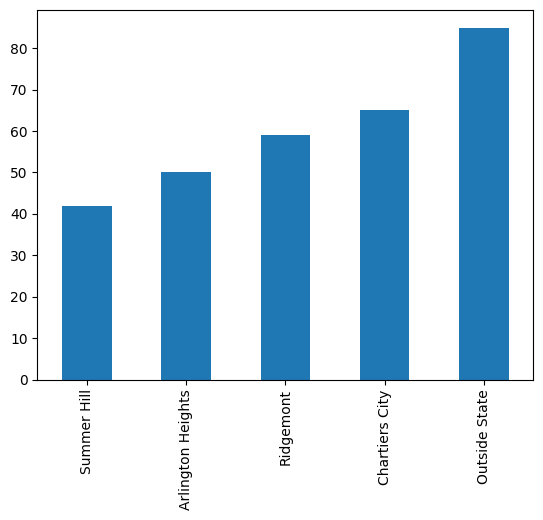

In [107]:
final_Series = pd.Series(n_values).sort_values()
final_Series.head().plot.bar()

Thus, **it has been determined that *Summer Hill* is the best Neighborhood using the current metric**.